# [PTM] Section 3

## 6. 신경망을 활용한 데이터 적합
### 6.1 인공 뉴런
- 딥러닝의 핵심인 신경망은 복잡한 함수를 단순한 함수들의 합성으로 표현할 수 있는 수학적 엔티티
- 신경망(neural network)이라는 용어는 인간의 뇌가 동작하는 방식을 연상
- 본질적으로, 뉴런(neuron)은 단순히 입력에 대한 선형 변환과 상수를 활성함수(activation funcion)라 부르는 고정된 비선형 함수를 적용하는 역할
- $o = f(w*x+b)$

#### 6.1.1 다중 계층 신경망 합성하기
```python
x_1 = f(w_0 * x + b_0)
x_2 = f(w_1 * x_1 + b_1)
...
y = f(w_n * x_n + b_n)
```

#### 6.1.2 오차 함수
- 선형 모델과 딥러닝의 주요한 차이 중 하나는 오차 함수의 모양
- 선형 모델의 경우, 최솟값이 분명하게 하나로 정의 -> 파라미터 조정이 하나의 정답에 가까워지도록 값을 추정
- 신경망의 경우, 근사하려는 각 파라미터는 정해진 답이 없음 -> 참값에 근사 (유용한 출력)

#### 6.1.3 활성 함수
- 활성 함수는 모델 내부에서 출력 함수가 값마다 다른 기울기를 가지도록 만들어 줌 (선형 함수 자체로는 불가능)
- 신경망은 여러 출력에 대해 각기 기울기가 다른 특성을 절묘하게 합성 -> 여러 임의의 함수에 근사
- 신경망의 마지막 계층은 이전의 선형 연산 출력을 주어진 범위로 모으는 역할

In [2]:
import math

trashCar = -2.2
Bear = 0.1
Dog = 2.5

print(
    math.tanh(trashCar),
    math.tanh(Bear),
    math.tanh(Dog),
    sep="\n"
)

-0.9757431300314515
0.09966799462495582
0.9866142981514303


#### 6.1.4 그 밖의 활성 함수

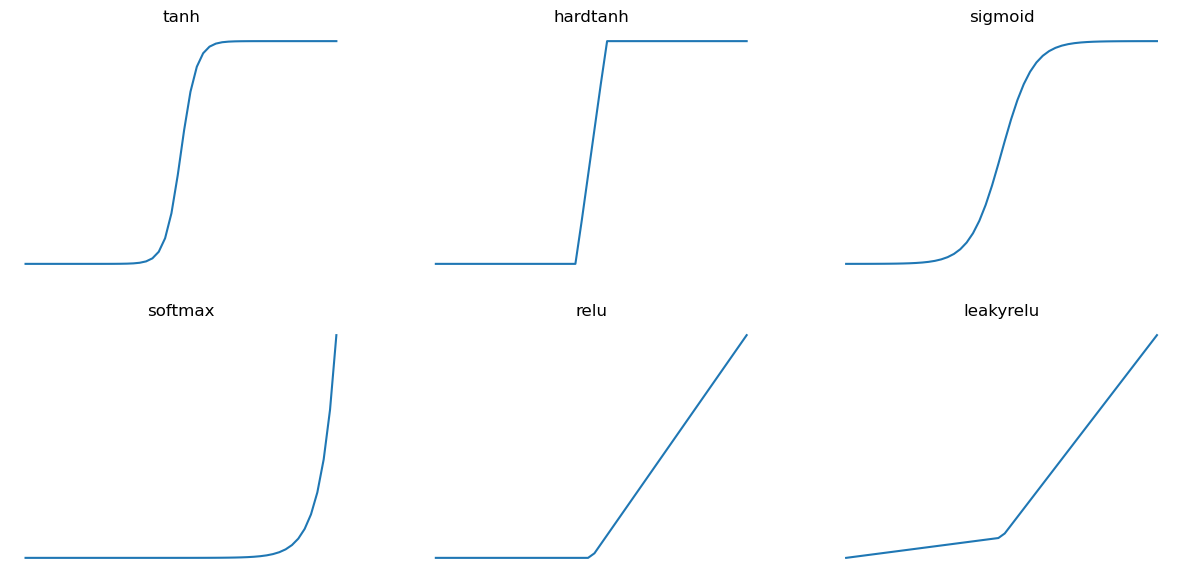

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

def tahnh(x): return np.tanh(x)
def softmax(x): return np.exp(x) / np.sum(np.exp(x), axis=0)
def hardtahn(x): return nn.Hardtanh(-1, 1)(torch.tensor(x))
def RELU(x):
    x1=[]
    for i in x:
        if i<0: x1.append(0)
        else: x1.append(i)
    return x1
def sigmoid(x): return 1/(1+np.exp(-x))
def leakyRELU(x): return np.maximum(0.1*x, x)

x = np.linspace(-10, 10)

plt.figure(figsize=(15, 7))
plt.subplot(231)
plt.plot(tahnh(x))
plt.title("tanh")
plt.axis(False)
plt.subplot(232)
plt.plot(hardtahn(x))
plt.title("hardtanh")
plt.axis(False)
plt.subplot(233)
plt.plot(sigmoid(x))
plt.title("sigmoid")
plt.axis(False)
plt.subplot(234)
plt.plot(softmax(x))
plt.title("softmax")
plt.axis(False)
plt.subplot(235)
plt.plot(RELU(x))
plt.title("relu")
plt.axis(False)
plt.subplot(236)
plt.plot(leakyRELU(x))
plt.title("leakyrelu")
plt.axis(False)
plt.show()

#### 6.1.5 최적의 활성 함수 고르기
- 비선형이다. 활성 함수 없이 (w*x+b)를 반복해서 적용하면 동일한(아핀 선형) 형태의 함수가 됨
  - 활성 함수의 비선형성이 전체 신경망이 더 복잡한 함수로 근사하도록 해주는 역할
- 미분 가능. 기울기 계산이 가능해짐
- 최소한 하나의 민감한 구간을 가지며 입력에서 중요 범위가 변경되면 일치하는 출력 영역에서도 중요한 변화가 발생
- 대부분이 둔감한(포화된) 구간을 가지며 이 구간에서는 입력의 변화가 출력에 거의 영향을 주지 않거나 아예 변화가 없다
- (항상X) 입력이 음의 무한대로 갈 떄 만나거나 가까워지는 저점이 있음
- (항상X) 비슷하게 양의 무한대로 갈 때에도 고점이 있음

#### 6.1.6 신경망에서 학습의 의미
- 선형 변환을 스택처럼 쌓아 만든 빌딩 블럭에 미분 가능한 활성 함수를 연결한 모델은 고차원의 비선형 작업에도 근사하며 파라미터 역시 경사 하강을 통해 꽤 잘 추정할 수 있음

In [35]:
x = range(-3, 3)

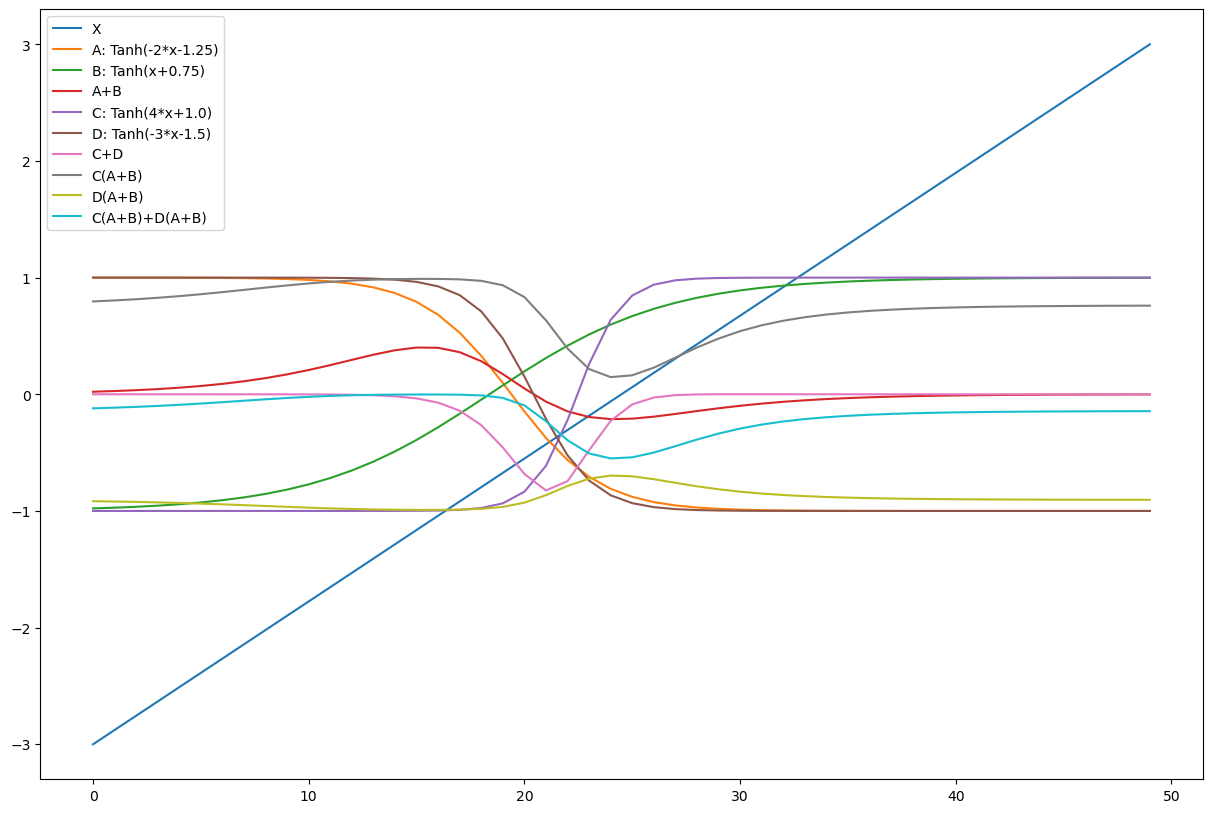

In [56]:
x = np.linspace(-3, 3)

plt.figure(figsize=(15, 10))
plt.plot(x)
plt.plot(tahnh(-2*x-1.25))
plt.plot(tahnh(x+0.75))
plt.plot(tahnh(-2*x-1.25)+tahnh(x+0.75))
plt.plot(tahnh(4*x+1.0))
plt.plot(tahnh(-3*x-1.5))
plt.plot(tahnh(4*x+1.0)+tahnh(-3*x-1.5))
plt.plot(tahnh(4*(tahnh(-2*x-1.25)+tahnh(x+0.75))+1.0))
plt.plot(tahnh(-3*(tahnh(-2*x-1.25)+tahnh(x+0.75))-1.5))
plt.plot(tahnh(4*(tahnh(-2*x-1.25)+tahnh(x+0.75))+1.0)+tahnh(-3*(tahnh(-2*x-1.25)+tahnh(x+0.75))-1.5))
plt.legend(["X", "A: Tanh(-2*x-1.25)", "B: Tanh(x+0.75)", "A+B", "C: Tanh(4*x+1.0)", "D: Tanh(-3*x-1.5)", "C+D", "C(A+B)", "D(A+B)", "C(A+B)+D(A+B)"])
plt.show()

### 6.2 파이토치 nn 모듈
- 신경망 전용 서브모듈
- 빌딩 블록 -> 모듈(module) or 계층(layer)
- 모듈은, `nn.Module` 베이스 클래스에서 파생된 파이썬 클래스

#### 6.2.1 forward 대시 __call__ 사용하기


In [59]:
# 5장 온도 변환 문제
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [65]:
linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[-0.7373],
        [-0.9946]], grad_fn=<AddmmBackward0>)

- 파이토치가 제공하는 `nn.Module`의 모든 서브클래스에는 `__call__` 메소드가 정의 -> 함수인것처럼 실행 가능  

```python
y = model(x) # correct
y = model.forward(x) # wrong
```

- `Module.__call__` 구현 코드 (JIT 생략)
```python
def __call__(self, *input, **kwargs):
    for hook in self._forward_pre_hooks.values():
        hook(self, input)
    result = self.forward(*input, **kwargs)

    for hook in self._forward_hooks.values():
        hook_result = hook(self, input, result)
        # ...
    for hook in self._backward_hooks.values():
        # ...
    return result
```

`model.forward(x)`을 수행하면 안되는 이유를 알 수 있음

#### 6.2.2 다시 선형 모델로


In [66]:
linear_model = nn.Linear(1, 1, True) # in_features, out_features, bias 
linear_model(t_un_val)

tensor([[3.0174],
        [6.6819]], grad_fn=<AddmmBackward0>)

만일, 온도와 기압을 입력 받는다면, `nn.Linear(2, 1)`과 같은 형태

In [67]:
linear_model.weight

Parameter containing:
tensor([[0.7634]], requires_grad=True)

In [68]:
linear_model.bias

Parameter containing:
tensor([0.4294], requires_grad=True)

In [69]:
x = torch.ones(1)
linear_model(x)

tensor([1.1928], grad_fn=<AddBackward0>)

##### 배치 입력 만들기
- `nn`에 있는 모든 모듈은 한 번에 여러 입력을 가진 **배치(batch)**에 대한 출력을 만들도록 작성되어 있음

In [71]:
# 10개의 샘플에 대해,
# B가 배치 크기이고, Nin이 입력 피처의 크기라면,
# B X Nin인 입력 텐서를 만들고 실행하는 예제는 다음과 같음
x = torch.ones(10, 1)
linear_model(x)

tensor([[1.1928],
        [1.1928],
        [1.1928],
        [1.1928],
        [1.1928],
        [1.1928],
        [1.1928],
        [1.1928],
        [1.1928],
        [1.1928]], grad_fn=<AddmmBackward0>)

##### 배치 최적화
- 배치(batch)를 수행하는 이유
  - 연산량을 충분히 크게 만들어 준비한 자원을 최대한 활용하기 위함
  - 배치가 클 수록 더 좋은 통계값을 얻을 수 있음

In [85]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

print("Batch 추가 이후", t_c.shape, t_u.shape, sep="\n")

Batch 추가 이후
torch.Size([11, 1])
torch.Size([11, 1])


In [86]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2
)

In [87]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

모델이 내부적으로, `parameters`를 들고 있으니 명시적으로 `model`에 `params`를 전달하지 않아도 됨

In [88]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # 직접 작성한 손실 함수를 사용하지 않아도 됨
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 128.5702, Validation loss 372.3021
Epoch 1000, Training loss 4.4547, Validation loss 10.5202
Epoch 2000, Training loss 2.8727, Validation loss 5.2306
Epoch 3000, Training loss 2.7444, Validation loss 4.7395

Parameter containing:
tensor([[5.2439]], requires_grad=True)
Parameter containing:
tensor([-17.0374], requires_grad=True)


### 6.3 드디어 신경망
#### 6.3.1 선형 모델 대체하기
- 손실 함수를 포한한 나머지 모든 것은 그대로 두고, `model`만 다시 정의

In [89]:
# nn.Sequential 컨테이너를 통해 모듈을 간단하게 결합 시켜줌
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
)

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

#### 6.3.2 파라미터 살펴보기
파라미터를 살펴보기 위해 차원 정보를 출력하는게 좋음

In [90]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

여러 개의 서브 모듈로 만들어진 모델의 파라미터를 추적할 경우, 파라미터를 이름으로 식별가능하게 하면 매우 편리  
-> `named_parameters` 메소드가 존재

In [91]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


`Sequential`의 각 모듈 이름은 인자에서 모듈이 나타난 순서를 따름  
-> `OrderedDict`을 이용해 이름을 전달해도 됨

In [92]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ("hidden_linear", nn.Linear(1, 8)),
    ("hidden_activtion", nn.Tanh()),
    ("ouput_linear", nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activtion): Tanh()
  (ouput_linear): Linear(in_features=8, out_features=1, bias=True)
)

이름을 붙이면 서브모듈을 더 쉽게 설명할 수 있음

In [93]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
ouput_linear.weight torch.Size([1, 8])
ouput_linear.bias torch.Size([1])


In [95]:
# 서브 모듈을 속성처럼 사용해 특정 parameter에 접근하는 것도 가능
seq_model.ouput_linear.bias

Parameter containing:
tensor([-0.3002], requires_grad=True)

In [96]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 139.2321, Validation loss 394.2755
Epoch 1000, Training loss 4.1408, Validation loss 45.2408
Epoch 2000, Training loss 2.6166, Validation loss 28.2487
Epoch 3000, Training loss 2.0195, Validation loss 20.2607
Epoch 4000, Training loss 2.4288, Validation loss 19.2754
Epoch 5000, Training loss 2.0605, Validation loss 16.4530
output tensor([[-0.0617],
        [24.0289]], grad_fn=<AddmmBackward0>)
answer tensor([[ 3.],
        [28.]])
hidden tensor([[ 2.0608e+01],
        [-9.8207e-03],
        [ 1.6909e+01],
        [-3.7369e-02],
        [ 6.8823e-01],
        [ 1.7866e+01],
        [-1.0549e+01],
        [-1.8288e+01]])


#### 6.3.3 선형 모델과 비교하기


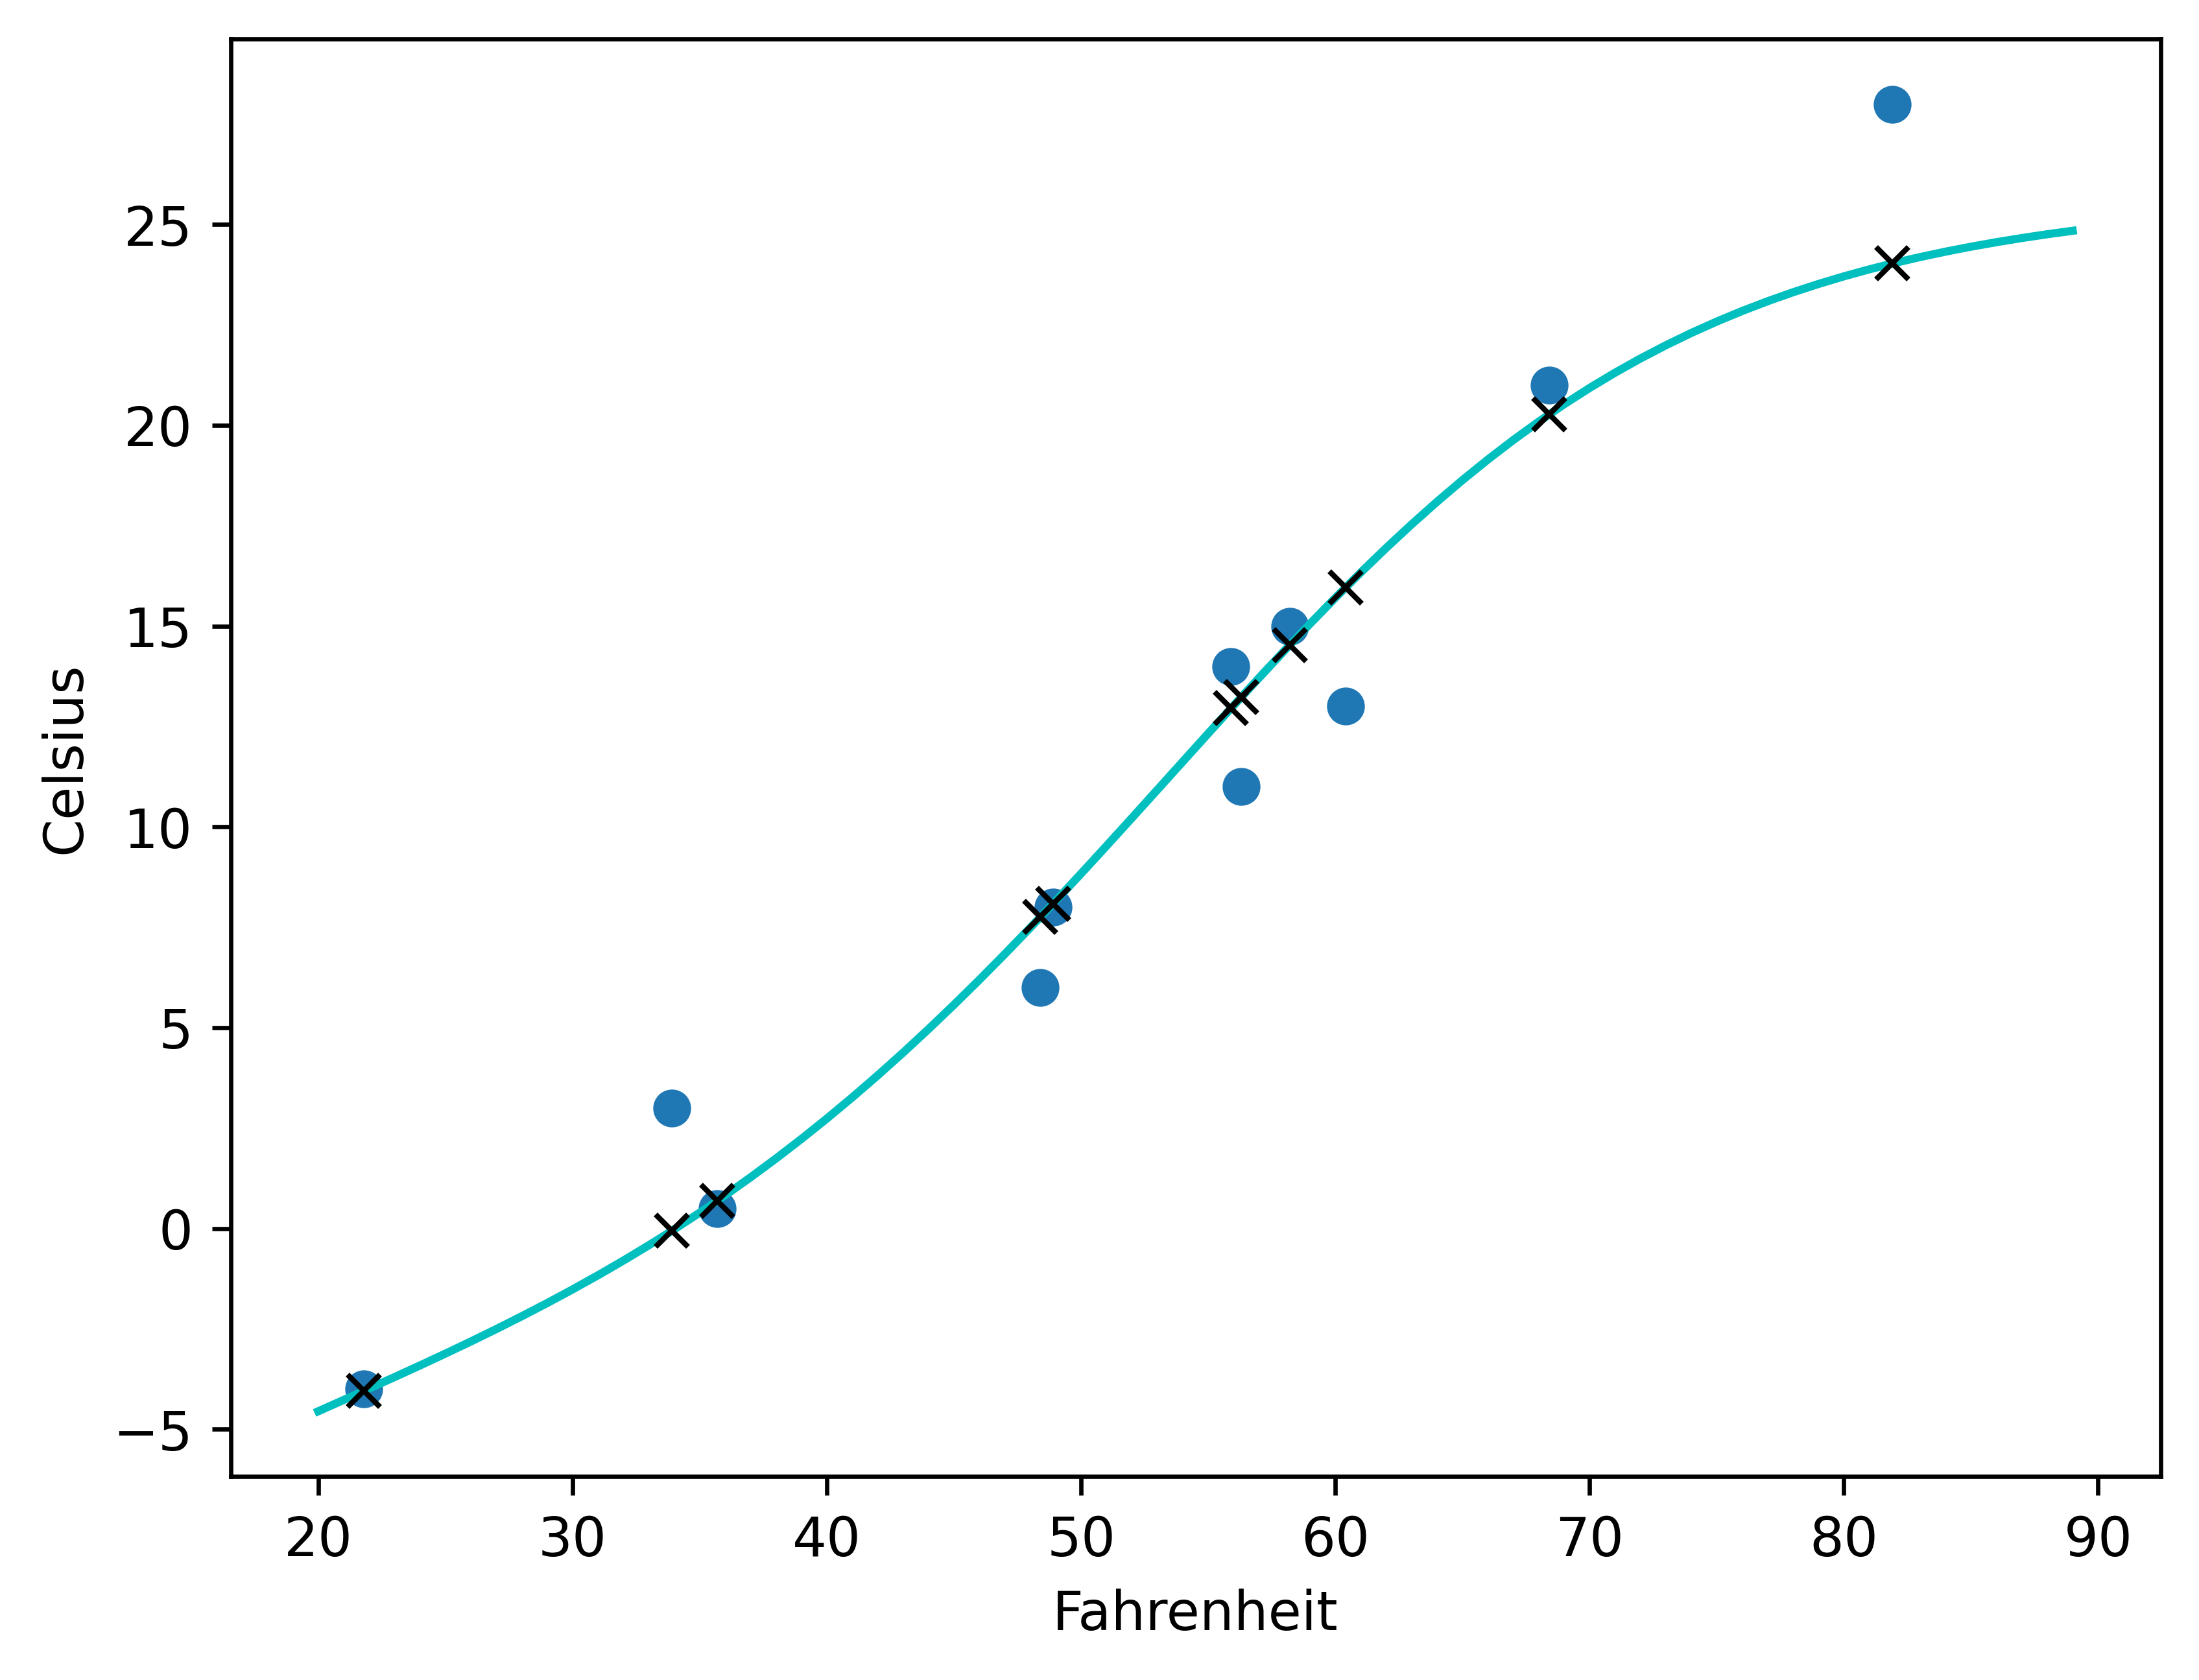

In [98]:
t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
plt.show()

## 7. 새와 비행기 구별하기: 이미지 학습
### 7.1 작은 이미지를 모아 놓은 데이터셋
#### 7.1.1 CIFAR-10 다운로드
- CIFAR-10은 32X32 크기의 RGB 이미지 6만 개로 구성되고, 1~10까지의 정수로 레이블링 되어있음
- 새로운 연구를 위한 개발이나 검증으로 사용하기에 단순하지만 학습용으로는 좋음

In [1]:
import torch
import torch.optim as optim
import torch.nn as nn

In [2]:
from torchvision import datasets
data_path = "./data-unversioned/p1ch7/"
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # train
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # validation

Files already downloaded and verified
Files already downloaded and verified


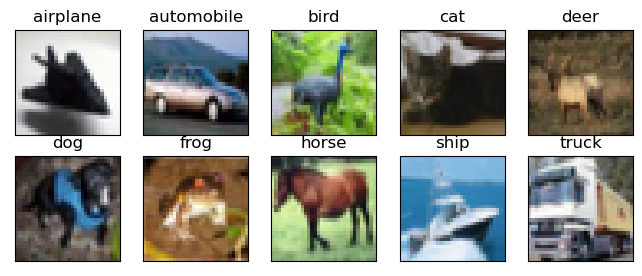

In [3]:
import matplotlib.pyplot as plt

class_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [4]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

#### 7.1.2 데이터셋 클래스
- `torch.utils.data.Dataset`은 `__len__`과 `__getitem__`을 구현하기 위해 필요한 객체
- `__len__`은 데이터셋의 아이템 수를 반환
- `__getitem__`은 샘플과 레이블(정수 인덱스)로 이루어진 아이템을 반환
- `IterableDataset`도 제공함

In [5]:
len(cifar10)

50000

In [6]:
img, label =  cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

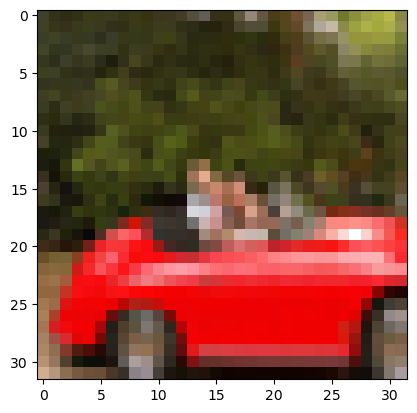

In [7]:
plt.imshow(img)
plt.show()

#### 7.1.3 데이터 변환
- 이미지를 파이토치 텐서
- `torchvision.transforms`가 필요
- 재구성 가능한 함수 형태의 여러 객체를 정의하고 있음

In [ ]:
from torchvision import transforms

dir(transforms)

In [9]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [10]:
# 변화 자체를 dataset의 인자로 전달도 가능
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [11]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [12]:
img_t.shape

torch.Size([3, 32, 32])

In [13]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

torch.Size([3, 32, 32])
torch.Size([32, 32, 3])


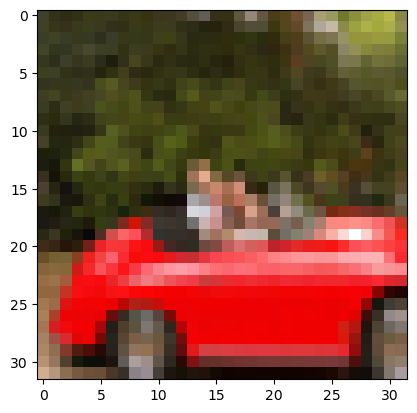

In [14]:
print(img_t.shape, img_t.permute(1, 2, 0).shape, sep="\n")
plt.imshow(img_t.permute(1, 2, 0)) # C*H*W -> H*W*C
plt.show()

#### 7.1.4 데이터 정규화
- 정규화와 데이터 증강(augmentaion)도 데이터 로딩과 함께 수행 가능
- 선형인 활성 함수를 이용하고, 데이터를 같은 범위에서 평균을 가지게 한다면 뉴런은 0이 아닌 기울기를 가지게 되므로 빨리 학습 할 수 있음
- 동일한 분산을 갖는다면, 채널 정보가 동일한 학습률로 경사 하강을 통해 섞이고 업데이트되는 것도 보장 가능

In [16]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [17]:
imgs.view(3, -1).mean(dim=1) # view(3, -1)은 세 채널은 유지하고 나머지 차원을 적절한 크기 하나로 합침, 3*32*32 -> 3*1024

tensor([0.4914, 0.4822, 0.4465])

In [18]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [19]:
# 정규화
transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [20]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
    ])
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


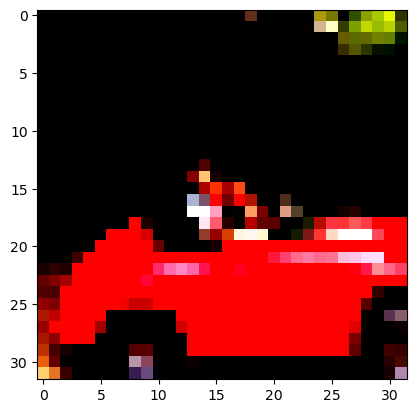

In [21]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

### 7.2 새와 비행기를 구별하기
#### 7.2.1 데이터셋 구축

In [31]:
data_path = "./data-unversioned/p1ch7/"

cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [32]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

#### 7.2.2 FC model

In [33]:
n_out = 2

model = nn.Sequential(
    nn.Linear(3*32*32, 512), # 입력 피처, 은닉층 크기
    nn.Tanh(),
    nn.Linear(512, n_out)
)

#### 7.2.3 분류기의 출력
- `softmax`를 이용

#### 7.2.4 출력을 확률로 표현하기

In [34]:
def softmax(x): return torch.exp(x) / torch.exp(x).sum()

In [35]:
x = torch.tensor([1.0, 2.0, 3.0])

softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [36]:
softmax(x).sum()

tensor(1.)

In [37]:
# 통상적으로 입력 텐서는 0번 차원이 배치에 해당하거나 확률 값을 특정 차원에 대해서만 인코딩하므로,
# 함수를 적용할 차원을 지정
softmax = nn.Softmax(dim=1)

x = torch.tensor([
    [1., 2., 3.],
    [1., 2., 3.]
])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [38]:
model = nn.Sequential(
    nn.Linear(3*32*32, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


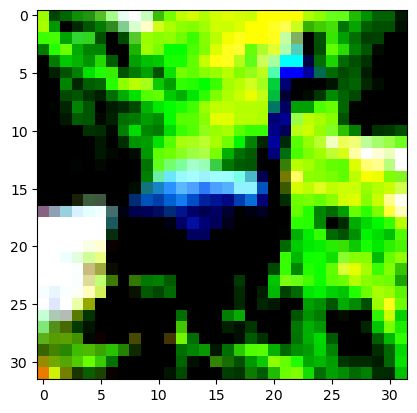

In [39]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [40]:
img_batch = img.view(-1).unsqueeze(0)

In [41]:
img_batch.shape

torch.Size([1, 3072])

In [42]:
out = model(img_batch)

out

tensor([[0.5400, 0.4600]], grad_fn=<SoftmaxBackward0>)

In [44]:
_, index = torch.max(out, dim=1)

index

tensor([0])

#### 7.2.5 분류를 위한 손실값
- 손실값은 확률에 의미를 부여
- 정답 클래스에 대한 확률 수치 -> **가능도(likehood)**

In [46]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

In [47]:
loss = nn.NLLLoss()

In [48]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(0.6531, grad_fn=<NllLossBackward0>)

#### 7.2.6 분류기 훈련

In [ ]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

lr = 1e-2
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.NLLLoss()
n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f"EPOCH: {epoch}, Loss: {float(loss)}")

- 한 번에 하나의 샘플을 평가하고 단일 샘플에 대해 역전파
  - 단일 샘플에서 부분적으로 기울기를 얻어 파라미터를 변경 (다른 샘플에 대해서는 안 좋아진것일 수도 있음)
- 각 에포크마다, 샘플을 섞은 후 한 번에 하나 혹은 여러 개의 샘플에 대해 기울기를 평가하면 경사 하강에 랜덤한 효과를 넣어 줄 수 있음 -> SGD

In [50]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

lr = 1e-2
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.NLLLoss()
n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f"EPOCH: {epoch}, Loss: {float(loss)}")

EPOCH: 0, Loss: 0.7222555875778198
EPOCH: 1, Loss: 0.4866991639137268
EPOCH: 2, Loss: 0.7123243808746338
EPOCH: 3, Loss: 0.16256645321846008
EPOCH: 4, Loss: 0.48691242933273315
EPOCH: 5, Loss: 0.18189944326877594
EPOCH: 6, Loss: 0.31341853737831116
EPOCH: 7, Loss: 0.3559952974319458
EPOCH: 8, Loss: 0.46215808391571045
EPOCH: 9, Loss: 0.24282273650169373
EPOCH: 10, Loss: 0.31223011016845703
EPOCH: 11, Loss: 0.46908289194107056
EPOCH: 12, Loss: 0.4589367210865021
EPOCH: 13, Loss: 0.47401750087738037
EPOCH: 14, Loss: 0.6625576019287109
EPOCH: 15, Loss: 0.18428102135658264
EPOCH: 16, Loss: 0.23401851952075958
EPOCH: 17, Loss: 0.2452256977558136
EPOCH: 18, Loss: 0.2978140115737915
EPOCH: 19, Loss: 0.41323012113571167
EPOCH: 20, Loss: 0.10224153846502304
EPOCH: 21, Loss: 0.33201703429222107
EPOCH: 22, Loss: 0.3858063220977783
EPOCH: 23, Loss: 0.2089006006717682
EPOCH: 24, Loss: 0.18228314816951752
EPOCH: 25, Loss: 0.12201312184333801
EPOCH: 26, Loss: 0.24459409713745117
EPOCH: 27, Loss: 0.24

- 데이터셋에서 한 번에 하나의 아이템을 골라 크기가 1인 미니 배치를 만듬 -> `DataLoader`

In [51]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted==labels).sum())
        
print(f"Acc: {correct/total}")

Acc: 0.817


In [52]:
# 파라미터 개수 확인
numel_list = [p.numel() for p in model.parameters() if p.requires_grad==True]

sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

#### 7.2.7 완전 연결의 한계
- 모든 정보 하나하나를 사용하며 출력 피처 하나하나에 대해 각 정보의 선형 조합(combination)을 계산
- 평행이동 불변성(translation invariance)이 없음
  - 모든 데이터를 증강 시켜, 모든 영역에서 스핏파이어를 보게 만들어야 함